<a href="https://colab.research.google.com/github/AlmaRosa13/Metodos_Numericos/blob/main/SolucionNumericadeEcsDiferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

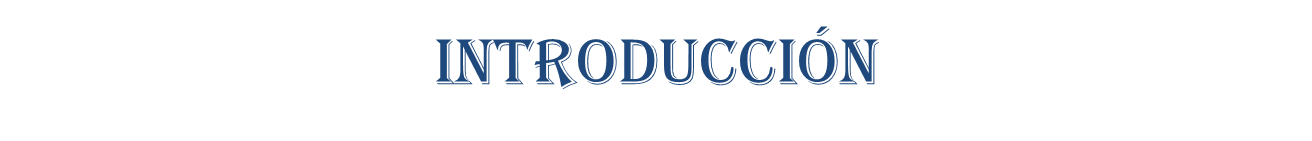

Una ecuación diferencial ordinaria (EDO) expresa la razón de cambio de la variable dependiente $y$ con respecto al cambio de una variable independiente $x$ \\

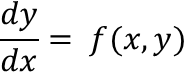

En una ecuación diferencial ordinaria, la función depende solamente de una variable y el orden se refiere a la derivada más alta. El grado de la ecuación es la potencia de la derivada de mayor orden que se tiene en la ecuación.

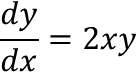

La variable dependiente puede ser la población de una bacteria en el tiempo, la temperatura de una sustancia en el tiempo, la concentración de un producto en un reactor; como vemos en muchos casos, la variable independiente es el tiempo, porque se quiere medir el cambio de algo (productos, concentración, población, altura, etc.) con respecto al tiempo. Dado que cada instante es distinto al anterior.

Las ecuaciones diferenciales se resuelven eliminando las derivadas que contienen y obteniendo las funciones que cumplen con la relación expresada en la ecuación diferencial.


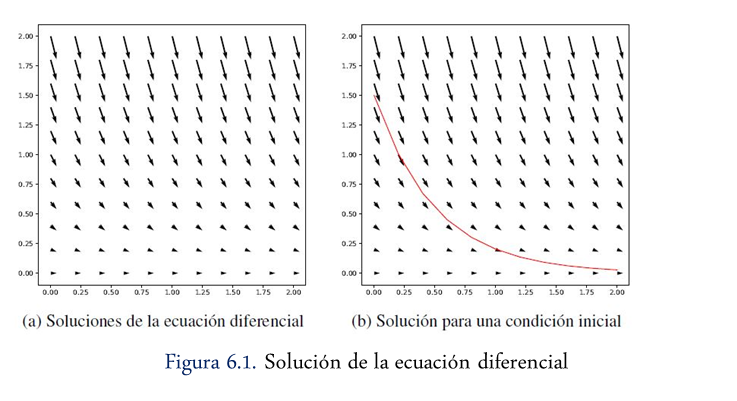

Los métodos aplicados a la resolución de ecuaciones diferenciales en Ingeniería Química son muchos y dependen principalmente del tipo de ecuación diferencial generado en cada problema. De modo general, podemos distinguir dos grandes grupos:

**Métodos analíticos.** Obtienen una solución exacta. Los métodos analíticos se ajustan a un solo tipo de ecuación diferencial, por lo que no hay un método general y en algunos casos de ecuaciones diferenciales no existen métodos analíticos, implican un conocimiento de cada método para aplicarlos. \\

**Métodos numéricos.** Obtienen una solución aproximada. Son métodos más genéricos y sólo dependen de las condiciones iniciales, no es una solución continua y se requiere hacer cálculos repetitivos.

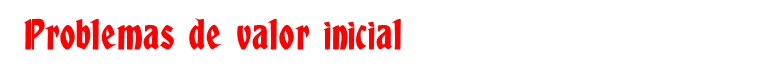

Como hemos visto, las ecuaciones diferenciales expresan la razón de cambio de una variable dependiente con respecto a cada cambio de la variable independiente, la solución de la ecuación diferencial debe cumplir una condición inicial dada, ya que, de lo contrario, sólo se tiene la solución
general. Por ejemplo, para la ecuación diferencial

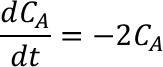


tiene como solución general

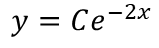

Donde $C$ es una constante arbitraria que puede ser cualquier valor real y cada uno es una solución de la ecuación diferencial. Como se requiere un valor inicial para obtener la solución particular, entonces el problema se convierte en uno de valor inicial, se requieren de tres puntos para resolver un problema de valor inicial.

1.   Una ecuación diferencial de primer orden
2.   Un punto inicial conocido $y(x_0) = y_0$
3.   El valor final al que se quiere llegar.

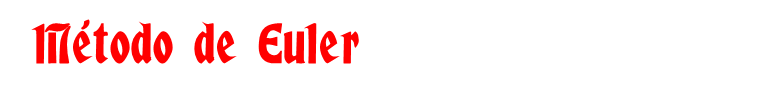

Para resolver una ecuación diferencial con un método numérico, sólo se cuenta con la ecuación diferencial $f(x,y)$ que gráficamente es la pendiente de una recta tangente a la función en el punto inicial $x_0$ y sabemos el valor de $y_0$ para identificar la solución única. Con estos elementos, lo que podemos construir es una línea recta con la pendiente que nos da la ecuación diferencial y evaluar cuánto vale en el punto final, esto nos dará una aproximación al valor buscado. \\

De tal manera que el punto calculado en $y(x_0+h)$ se obtiene con:

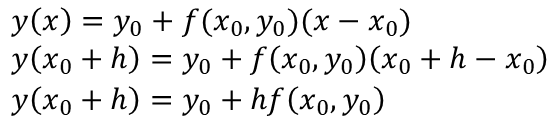


El cual nos da una aproximación al valor de $y(x_0+h)$ dado que no conocemos la ecuación de $y$. \\

La diferencia entre la aproximación de Euler con el valor correcto se da porque se toma la derivada en el punto inicial $x_0$ para hacer la aproximación; como se observa en la figura 6.2, el valor de la pendiente cambia en el intervalo $x_0$ y $x_0+h$, si tomamos cada cambio de la derivada se puede hacer
una mejor aproximación.


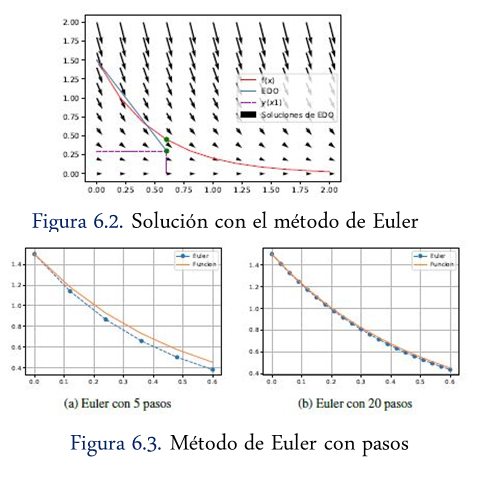


Se observa en la figura 6.3a el método de Euler con 5 pasos y en la figura 6.3b con 20 pasos.
Definimos $h$ como el tamaño de paso, y $n$ como el número de pasos.


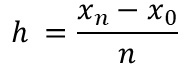


Cada paso será de tamaño $h$, de tal manera que

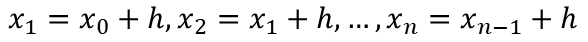


y los valores de cada $y_{i+1}$ se obtienen con la siguiente ecuación:

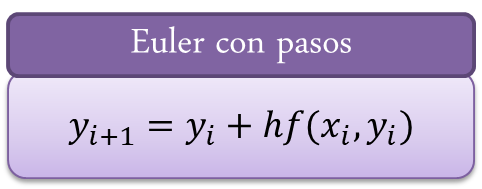

# **Ejemplo 6.1—** ***Método de Euler.*** Calcular la concentración final de A si la constante de velocidad de reacción $k = 2$ y la concentración inicial $C_{A_0}= 1.5$ en el tiempo 0, calcular en el tiempo $t_n = 0.6$.

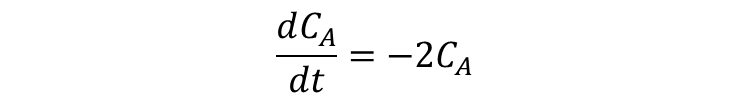

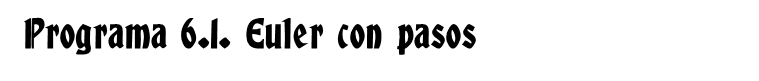

x =  [0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6 ]
y =  [1.5        1.41       1.3254     1.245876   1.17112344 1.10085603
 1.03480467 0.97271639 0.91435341 0.8594922  0.80792267 0.75944731
 0.71388047 0.67104764 0.63078479 0.5929377  0.55736144 0.52391975
 0.49248457 0.46293549 0.43515936]


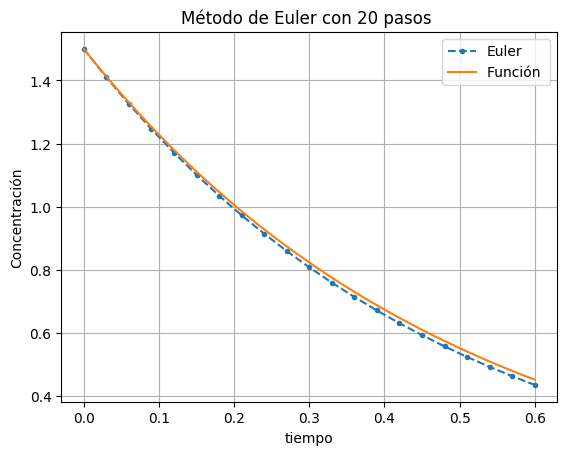

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Euler
def euler(f,x0,y0,x1,n):
  h=(x1-x0)/n # tamano de paso
  xi=np.zeros(n+1) # vector de x variable independiente
  yi=np.zeros(n+1) # vector de y variable dependiente
  xi[0]= x0 # tiempo iniicial
  yi[0]= y0 # concentracion inicial

  for i in range (n):
    yi[i+1]= yi[i]+h*f(xi[i],yi[i])
    xi[i+1]= xi[i]+h
  return xi,yi # Vector de valores calculados

def f(x,y):
  return -2*y

def f2(x):
  return np.exp(-2*x)*1.5

def main():
  x0 =0 # valor inicial de tiempo
  y0 =1.5 # valor inicial de la concentracion
  x1 =0.6 # valor final del tiempo
  n =20 # numero de pasos
  # llamada a la funcion euler
  x,y= euler(f,x0,y0,x1,n)
  print('x = ',x)
  print ('y = ',y)

  # Grafica
  fig = plt.figure()
  plt.plot(x,y,'.--',label = 'Euler')
  plt.plot(np.linspace(x0,x1,50),f2(np.linspace(x0,x1,50)),label='Función ')
  plt.grid()
  plt.legend()
  plt.title('Método de Euler con '+ str(n)+' pasos ')
  plt.xlabel('tiempo')
  plt.ylabel( 'Concentración')
  plt.show()
  # fig.savefig (" edo_euler5 . pdf ", bbox_inches = ' tight ')

if __name__=="__main__":main()

# **Ejercicio 6.2—** *Euler con pasos*.

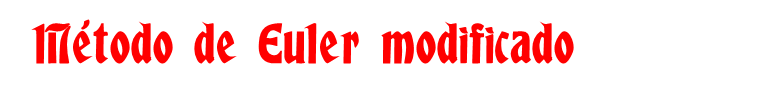

Como observamos en el método de Euler de un paso, el cálculo de $y_{i+1}$ se obtiene con la ecuación de la línea recta con pendiente $f(x_i,y_i)$ (figura 6.4a), la cual es una aproximación con un cierto error. \\

Si calculamos la pendiente en el punto $y_{i+1}$ evaluando la ecuación diferencial como $f(x_{i+1},y_{i+1})$ (figura 6.4b) y promediamos ambas pendientes, obtendremos un mejor resultado (figura 6.4c).



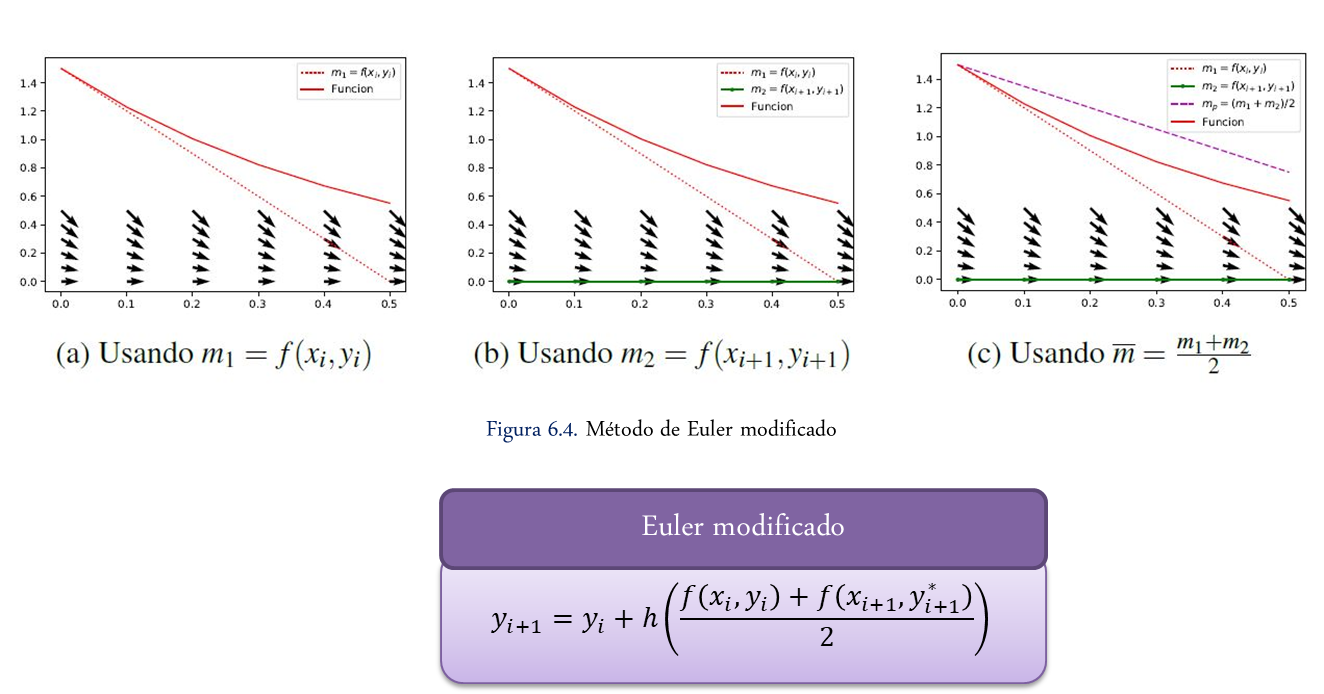



# **Ejemplo 6.3—** ***Método de Euler modificado..*** Calcular la concentración final de A si la constante de velocidad de reacción $k = 2$ y la concentración inicial $C_{A_0}= 1.5$ en el tiempo 0, calcular en el tiempo $t_n = 0.6$.

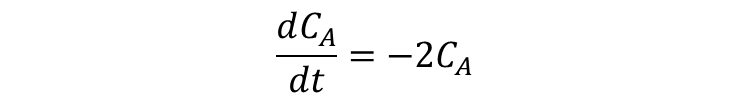

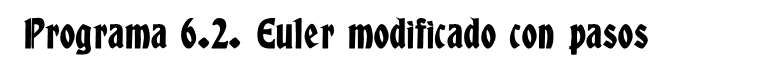

x =  [0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6 ]
y =  [1.5        1.4127     1.33048086 1.25304687 1.18011955 1.11143659
 1.04675098 0.98583007 0.92845476 0.87441869 0.82352753 0.77559822
 0.73045841 0.68794573 0.64790729 0.61019908 0.5746855  0.5412388
 0.5097387  0.48007191 0.45213172]


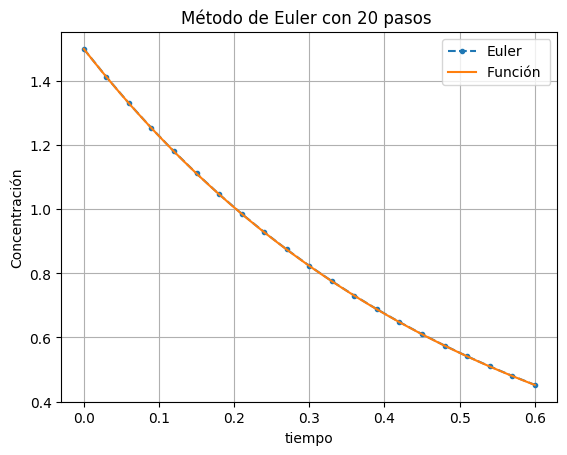

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Euler
def euler(f,x0,y0,x1,n):
  h=(x1-x0)/n # tamano de paso
  xi=np.zeros(n+1) # vector de x variable independiente
  yi=np.zeros(n+1) # vector de y variable dependiente
  xi[0]= x0 # tiempo iniicial
  yi[0]= y0 # concentracion inicial

  for i in range(n):
    xi[i+1]= xi[i]+h
    yi[i+1]= yi[i]+h*f(xi[i],yi[i])
    yi[i+1]= yi[i]+h*(f(xi[i],yi[i])+f(xi[i+1],yi[i +1]))/2

  return xi,yi # Vector de valores calculados

def f(x,y):
  return -2*y

def f2(x):
  return np.exp(-2*x)*1.5

def main():
  x0 =0 # valor inicial de tiempo
  y0 =1.5 # valor inicial de la concentracion
  x1 =0.6 # valor final del tiempo
  n =20 # numero de pasos
  # llamada a la funcion euler
  x,y= euler(f,x0,y0,x1,n)
  print('x = ',x)
  print ('y = ',y)

  # Grafica
  fig = plt.figure()
  plt.plot(x,y,'.--',label = 'Euler')
  plt.plot(np.linspace(x0,x1,50),f2(np.linspace(x0,x1,50)),label='Función ')
  plt.grid()
  plt.legend()
  plt.title('Método de Euler con '+ str(n)+' pasos ')
  plt.xlabel('tiempo')
  plt.ylabel('Concentración')
  plt.show()
  # fig.savefig ("edo_euler5.pdf ", bbox_inches = 'tight')

if __name__=="__main__":main()

# **Ejemplo 6.3—** ***Método de Euler modificado aplicado a mezclas.*** Se requiere calcular la cantidad de una sustancia, $C(t)$, que hay en un tanque en cada instante de tiempo $t$. Sabiendo que la derivada de $C$ respecto a $t$ expresa la razón de cambio de la sustancia presente en el tanque, se cumple la relación


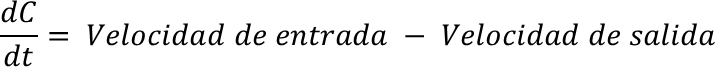


Dada la velocidad a la que el fluido que contiene la sustancia entra en el tanque y la concentración de la sustancia, se cumple la relación


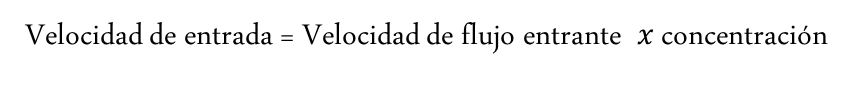


Suponiendo que la concentración de la sustancia es uniforme, para calcular la concentración se divide $C(t)$ por el volumen de la mezcla que hay en el instante t. Así,


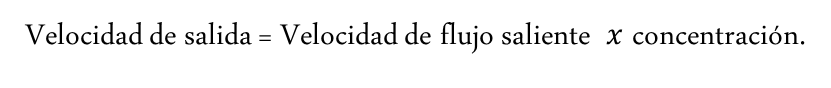


Por ejemplo, un tanque de $1000 \, litros$ de una solución tiene $50 \, kg$ de sal. La solución se mantiene bien agitada y entra un flujo a una velocidad de $20 \, litros/min$ con una concentración de $0.08 \, kg/litro$, por otro lado, sale un flujo de $20 \, litros/min$, ¿cuál es la cantidad de sal pasados $30 \, min$?.




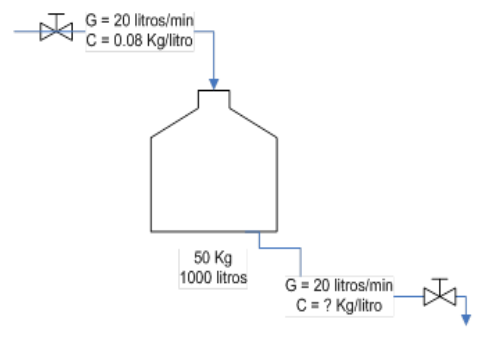












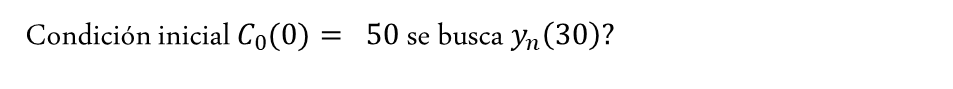













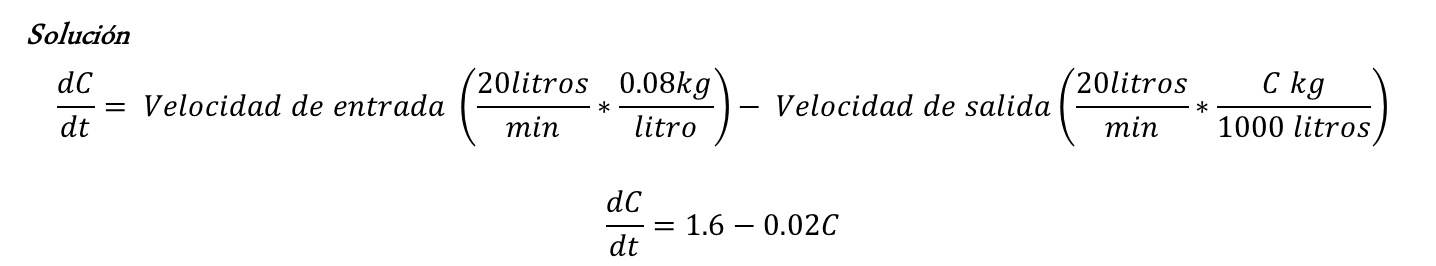

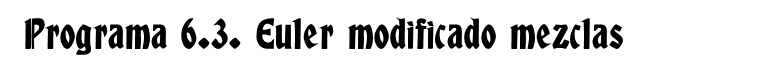

x =  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
y =  [50.         50.594      51.1762388  51.74694927 52.30635968 52.85469375
 53.39217082 53.91900584 54.43540952 54.94158841 55.43774496 55.92407761
 56.40078087 56.86804541 57.32605811 57.77500216 58.21505712 58.64639899
 59.06920029 59.48363012 59.88985425 60.28803513 60.67833204 61.06090106
 61.43589522 61.8034645  62.1637559  62.51691353 62.86307865 63.20238969
 63.53498237]
La cantidad de sal a los 30 min es de 63.53 kg


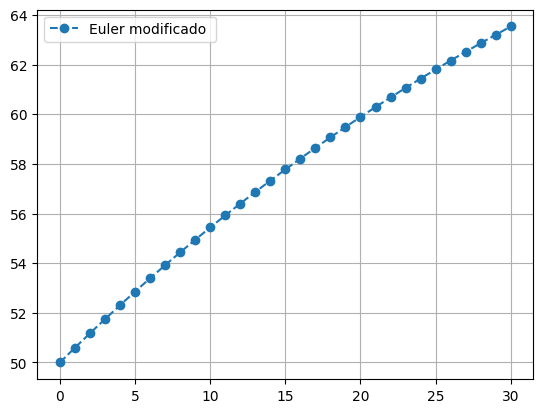

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Euler
def euler_mod(f,x0,y0,x1,n):
  h=(x1-x0)/n # tamano de paso
  xi=np.zeros(n+1) # vector de x variable independiente
  yi=np.zeros(n+1) # vector de y variable dependiente
  xi[0]= x0 # tiempo iniicial
  yi[0]= y0 # concentracion inicial

  for i in range (n):
    xi[i +1]= xi[i]+h
    yi[i +1]= yi[i]+h*f(xi[i],yi[i])
    yi[i +1]= yi[i]+h*(f(xi[i],yi[i])+f(xi[i+1] , yi[i +1]))/2

  return xi,yi # Vector de valores calculados

def f(x,y):
  return 1.6 -0.02*y

def main():
  x0 =0 # valor inicial de tiempo
  y0 =50 # valor inicial de la concentracion
  x1 =30 # valor final del tiempo
  n =30 # numero de pasos
  # llamada a la funcion euler
  x,y= euler_mod(f,x0,y0,x1,n)
  print('x = ',x)
  print('y = ',y)
  print('La cantidad de sal a los 30 min es de 63.53 kg')

  # Grafica
  fig = plt.figure()
  plt.plot (x,y,'o--',label = 'Euler modificado ')
  plt.grid()
  plt.legend()
  plt.show()
  #fig.savefig(" edo_euler_mod_mezclas.pdf ", bbox_inches = 'tight ')

if __name__=="__main__":main()

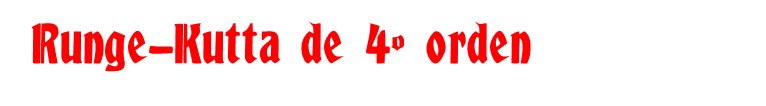

En un problema de ecuaciones diferenciales, el objetivo es conocer el valor de la variable dependiente en un punto distinto a la condición inicial. La aproximación que se puede hacer con los elementos con que contamos es sólo la ecuación diferencial que mide el cambio de la variable dependiente, la ecuación es la del método de Euler.

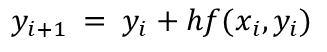



Si desarrollamos la serie de Taylor bajo este concepto tenemos

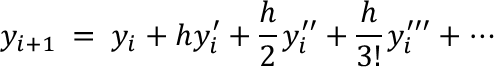

Utilizando la expansión de primer orden obtenemos el método de Euler, $y_{i+1}=y_i+hf(x_i,y_i)$ en donde $f(x_i,y_i)$ es la propia función $f$ de la ecuación diferencial, es decir, la pendiente en $(x_i,y_i)$. En este caso, el error es del orden de $h^2$. \\

En el método de Runge-Kutta, $f$ es una media ponderada de valores de $f(x,y)$ en el intervalo $[x_i,x_[{i+1}]$, y se dice que es de orden $m$ si alcanza una aproximación equiparable a la del desarrollo de Taylor de ese orden. \\

El método de Runge-Kutta de segundo orden


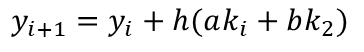


El primer término de la media ponderada es siempre la pendiente al principio del intervalo

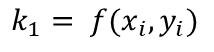


y el segundo


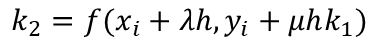


Donde $0 < λ < 1$ Los pasos a,b y los números $λ$, $\mu$ se fijan imponiendo que el algoritmo sea compatible con un desarrollo de Taylor de orden 2, y se ha impuesto la forma $λhk_1$ del segundo incremento para facilitar dicha comparación. Desarrollando $k_2$.


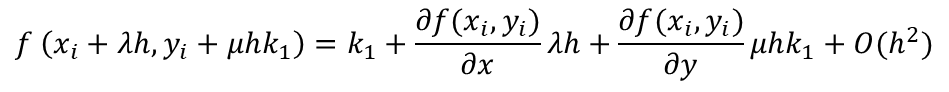


resulta

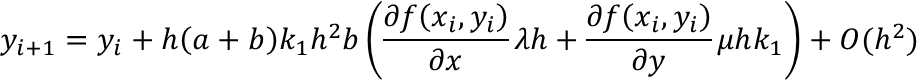



Comparamos ahora esta última expresión con el desarrollo de Taylor de $y(x_{i+1}=y(x_i+h)$


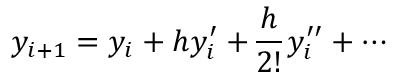


Sustituyendo $y(x_i)$ por su valor aproximado $y_i$ y notando que


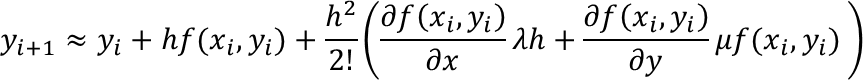



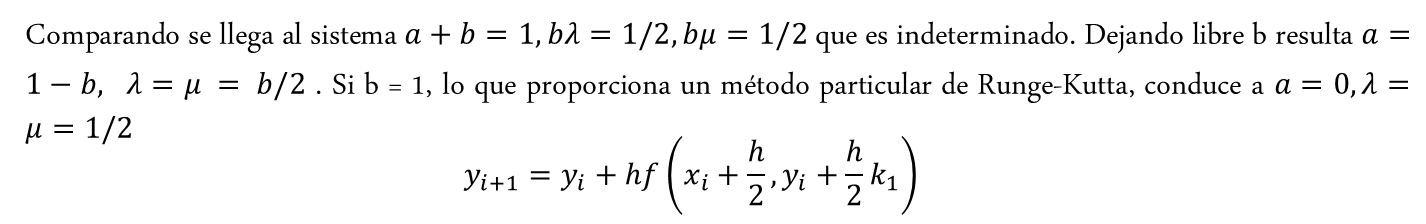

Un Runge-Kutta de tercer orden está dado por


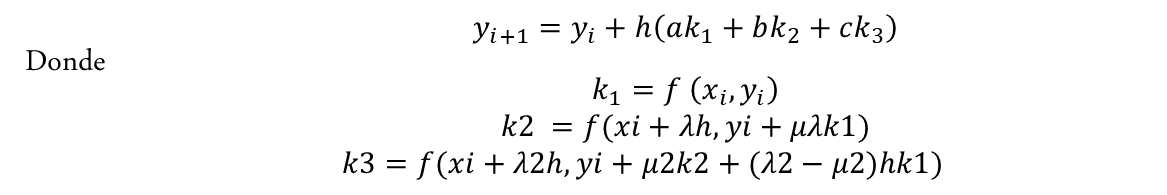


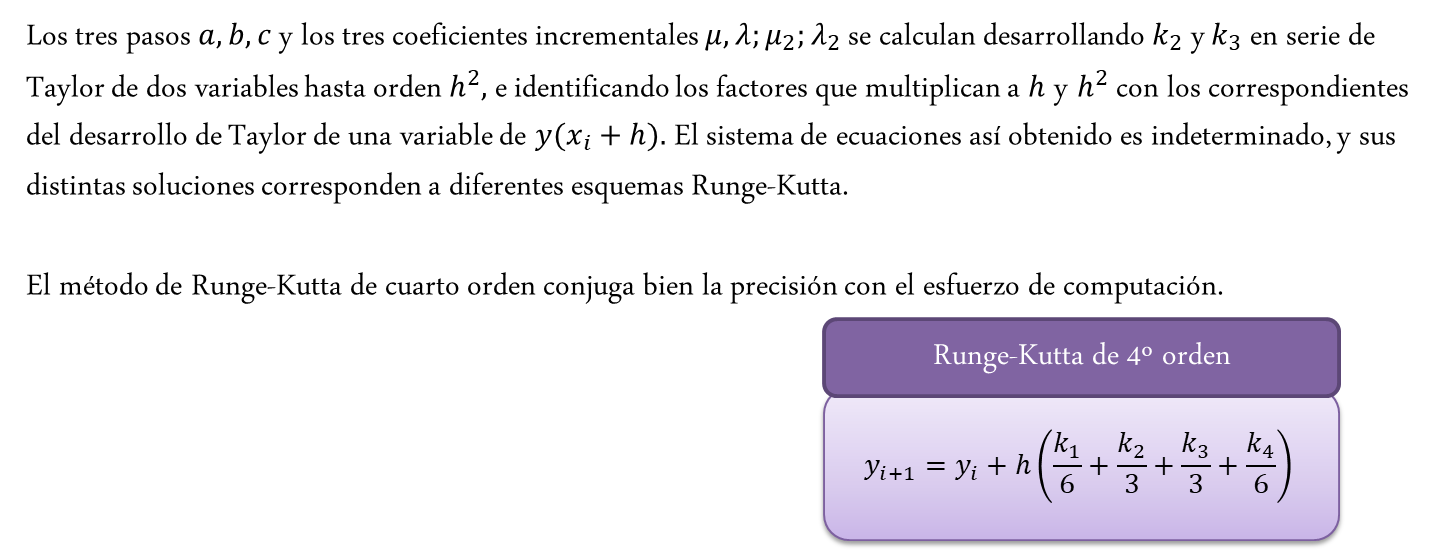

# **Ejemplo 6.4—** ***Método de Runge-Kutta de 4º orden.*** Un tanque esférico de radio R está inicialmente lleno de agua. En el fondo del tanque hay un agujero de radio r, por el cual escapa el agua bajo la influencia de la gravedad. La ecuación diferencial que expresa la profundidad del agua como función del tiempo es:

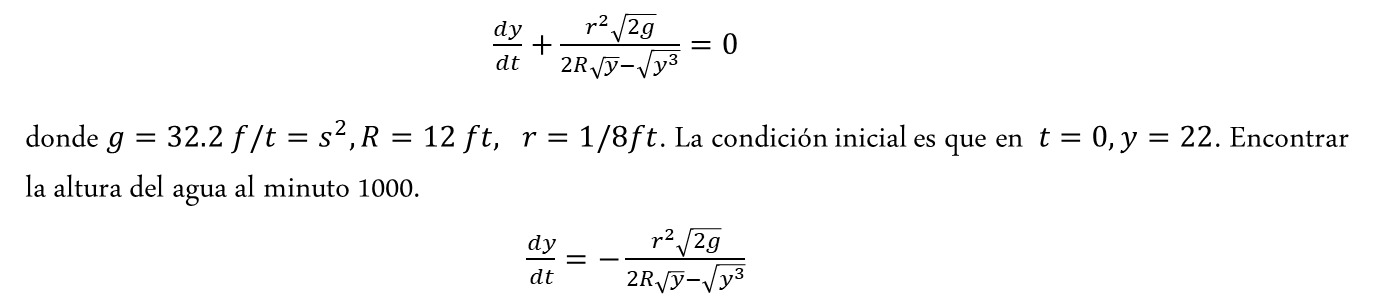

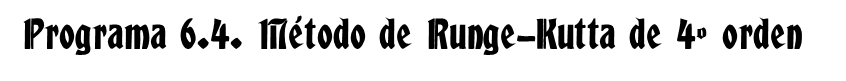

x =  [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
y =  [22.         20.9302613  20.13213069 19.46148227 18.86896063 18.33050353
 17.83222571 17.36524926 16.92348771 16.50255067 16.09914568]


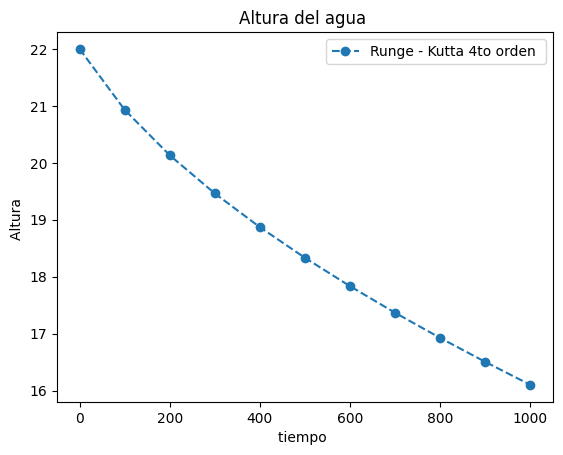

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Runge - Kutta
def rungekutta4o(f,x0,y0,x1,n):
  h=(x1-x0)/n # tamano de paso
  xi=np.zeros(n+1) # vector de x variable independiente
  yi=np.zeros(n+1) # vector de y variable dependiente
  xi [0]= x0 # tiempo iniicial
  yi [0]= y0 # concentracion inicial

  for i in range(n):
    k1=f(xi[i],yi[i])
    k2=f(xi[i]+h/2,yi[i]+ k1*h/2)
    k3=f(xi[i]+h/2,yi[i]+ k2*h/2)
    k4=f(xi[i]+h,yi[i]+ k3*h)
    yi[i+1]= yi[i]+h*( k1/6+ k2/3+ k3/3+ k4/6)
    xi[i+1]= xi[i]+h

  return xi,yi # Vector de valores calculados

# ecuacion diferencial
def f(x,y):
  g =32.2
  R =12
  r =1/8
  return -(r**2*np.sqrt(2*g))/(2*R*np.sqrt(y)-np.sqrt(y**3) )


def main ():
  x0 =0 # valor inicial de tiempo
  y0 =22 # valor inicial de la altura
  x1 =1000 # valor final del tiempo
  n =10 # numero de pasos
  # llamada a la funcion rungekutta4o
  x,y= rungekutta4o(f,x0,y0,x1,n)
  print( 'x = ',x)
  print( 'y = ',y)
  # Grafica
  fig = plt.figure()
  plt.plot(x,y, 'o--',label = 'Runge - Kutta 4to orden ')
  plt.title( 'Altura del agua ')
  plt.xlabel( 'tiempo ')
  plt.ylabel( 'Altura ')
  plt.legend()
  plt.show()
  # fig . savefig (" edo_rungekutta.pdf ", bbox_inches = ' tight ')

if __name__=="__main__":main()

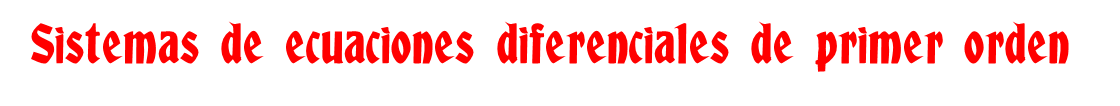

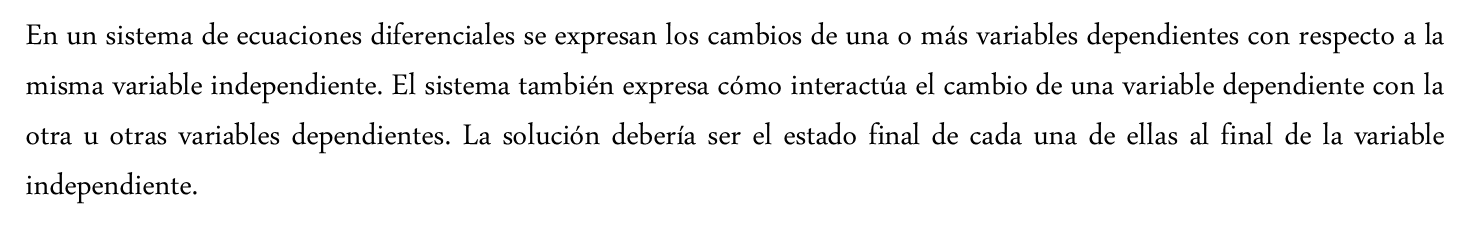

# **Ejemplo 6.—** ***Sistema de ecuaciones diferenciales de primer orden.***


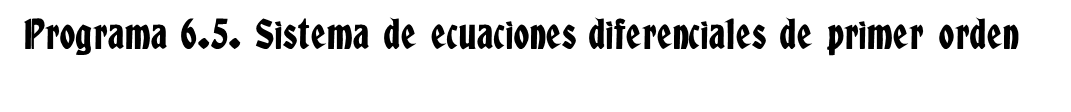

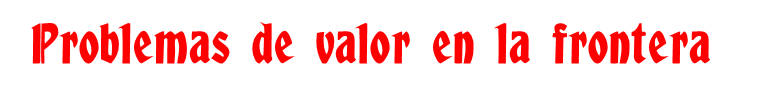

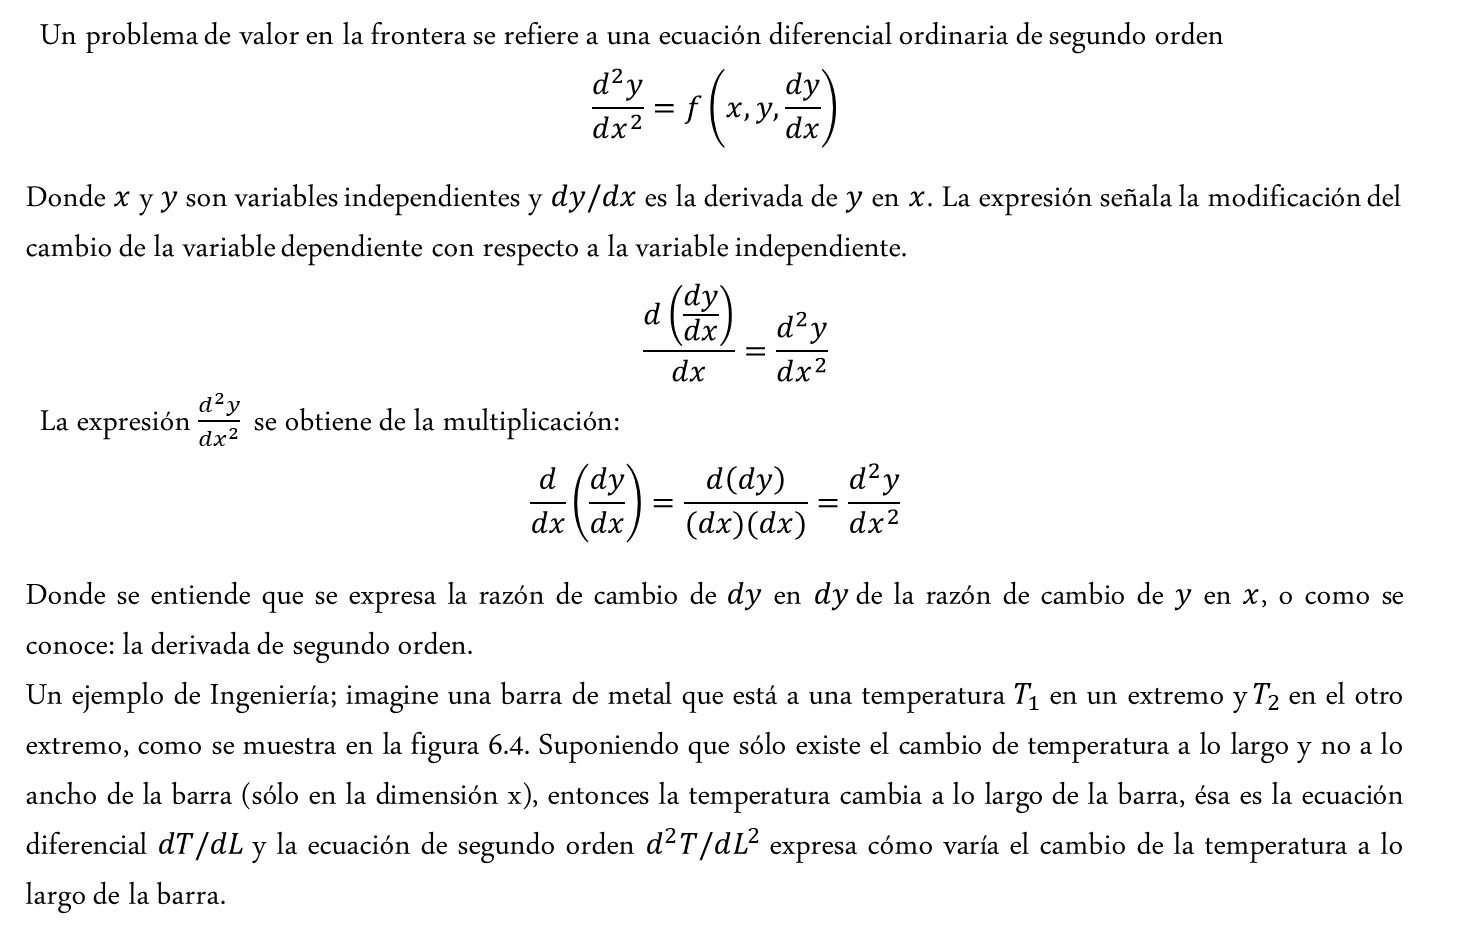




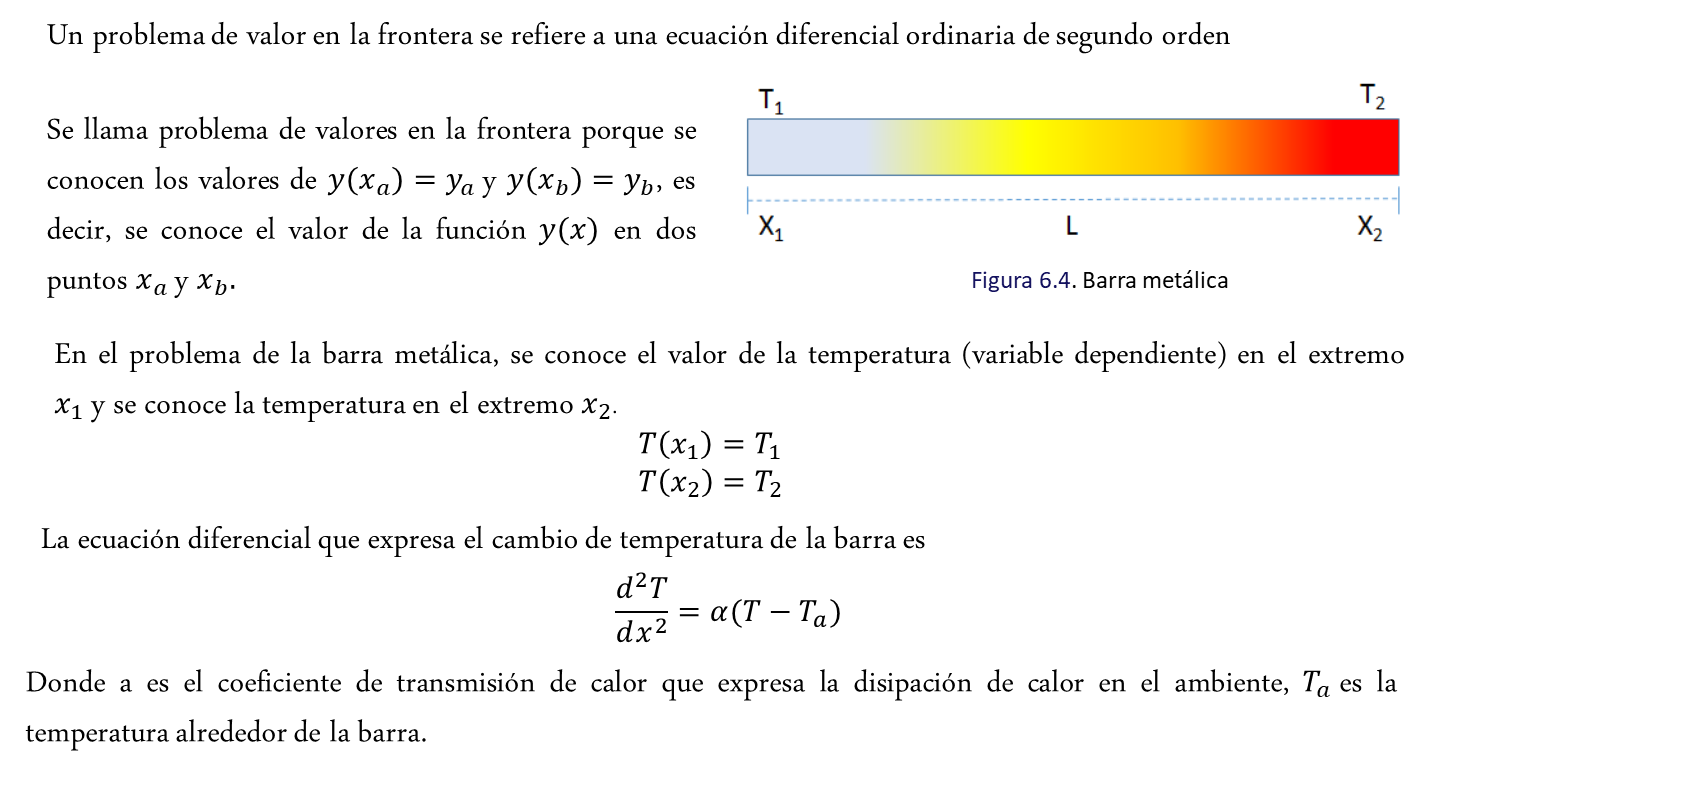



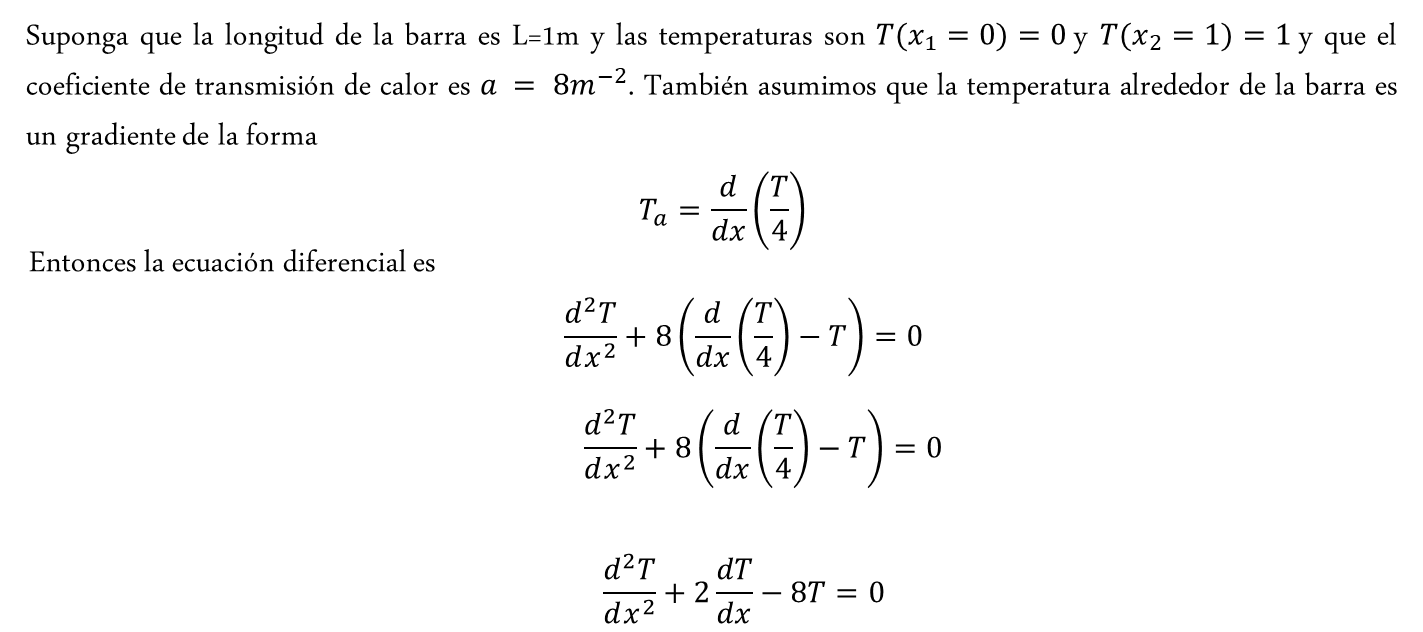

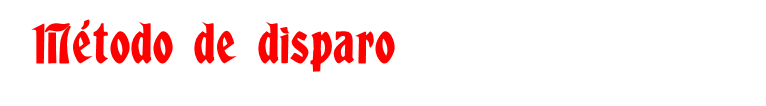

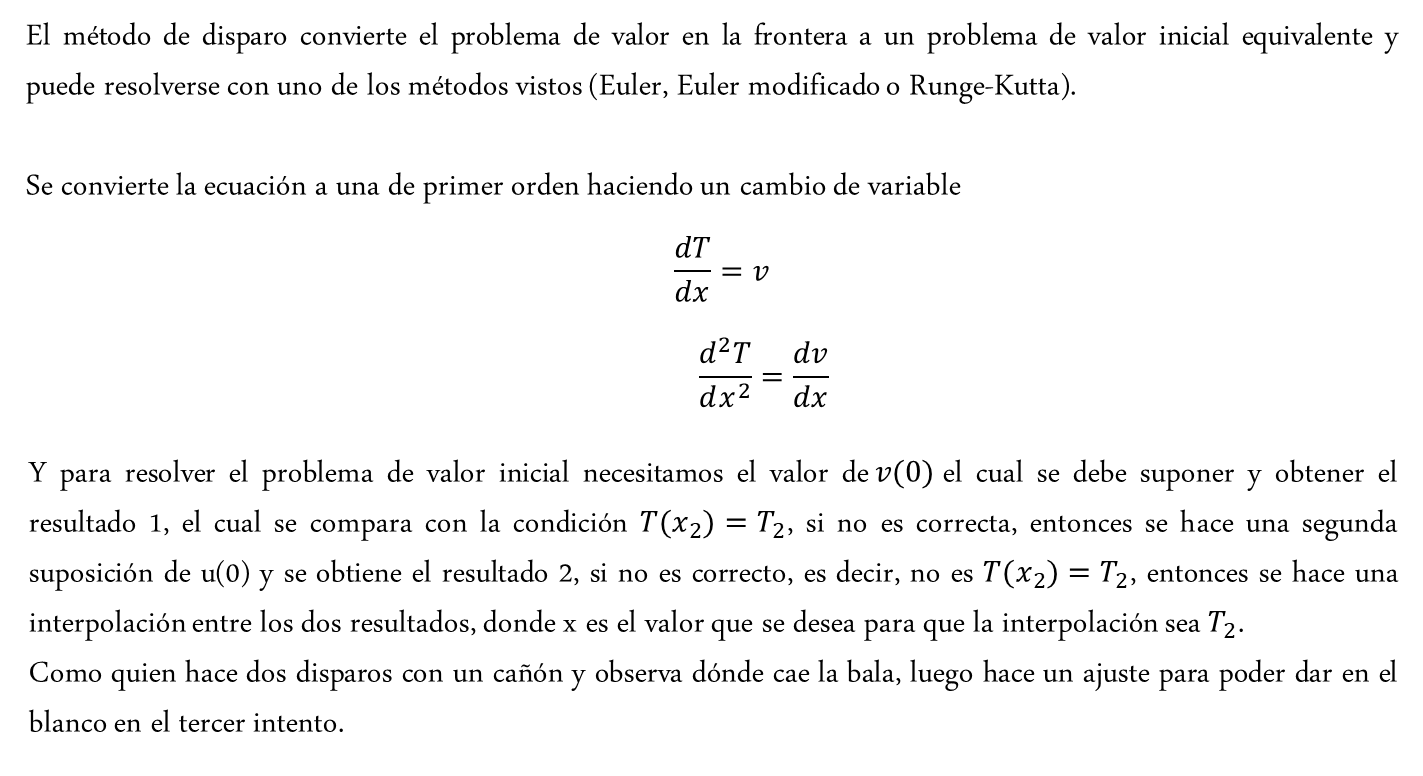

# **Ejemplo 6.5—** ***Problema de valor en la frontera por el método del disparo.*** Usando el ejemplo de la barra metálica mostrado en la figura 6.4 y la ecuación 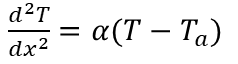

 y los siguientes datos:



 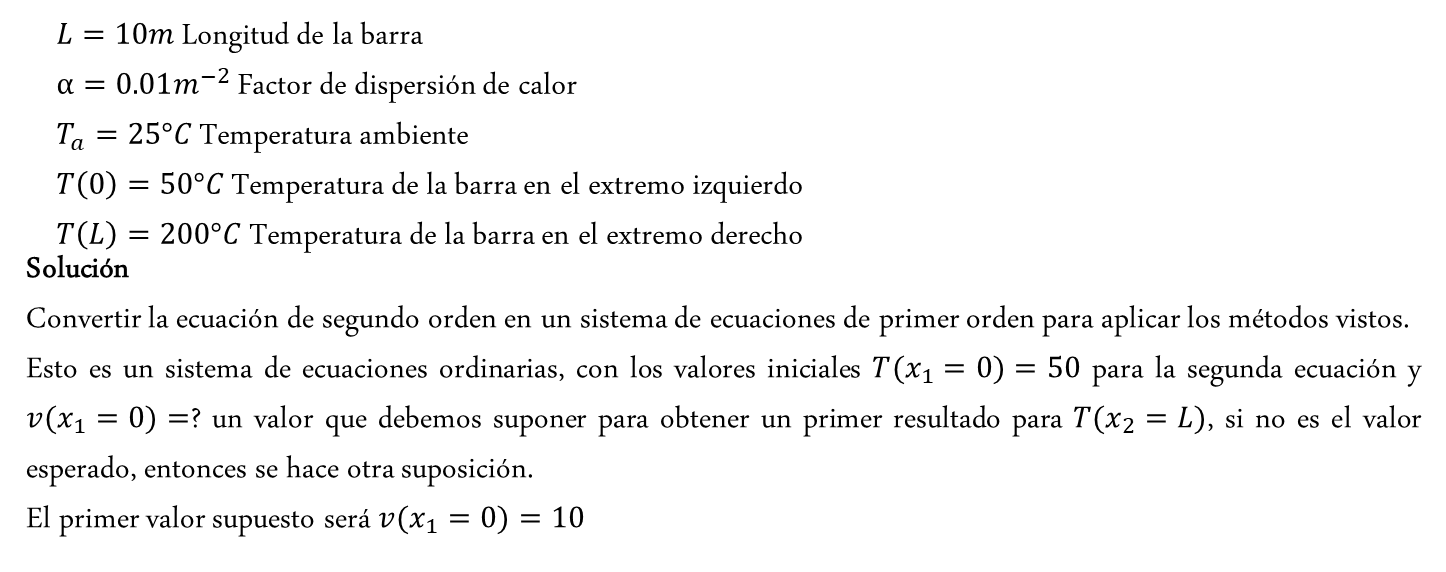

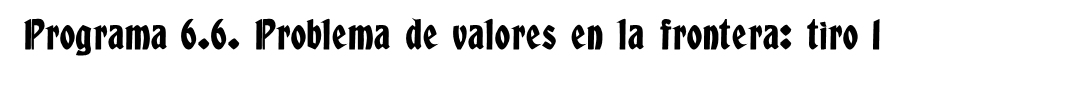

Temperatura en el extremo x2=L : 181.09713828684858 


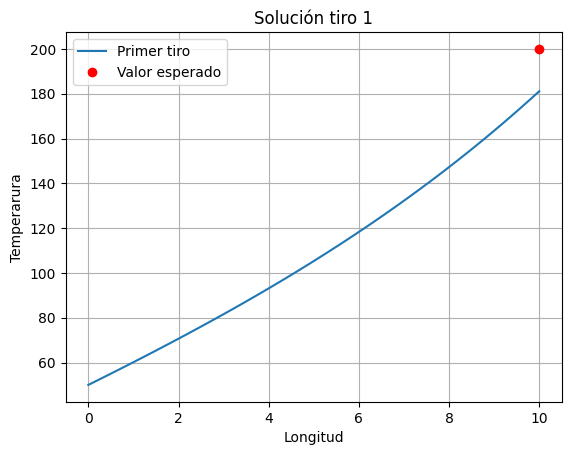

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(U,y):
  u1,u2 = U
  alfa = 0.01
  Ta = 25
  du1dy = u2
  du2dy = alfa*(u1-Ta)
  return [du1dy,du2dy ]

def main():
  L = 10 # Longitud de la barra
  Tx1 = 50 # temperatura en el extremo x1 =0
  Tx2 = 200 # temperatura en el extremo x2=L
  dT = 10 # Valor supuesto de la derivada <<<<<<<<<<< Nuevo valor REALIZAR PARA 20, 11.609

  longitud = np.linspace(0,L) # Vector de la longitud de la barra
  # Solucion del sistema
  U = odeint (f,[Tx1,dT],longitud)
  print('Temperatura en el extremo x2=L : {} '.format(U[-1,0]))
  print('El resultado 181.09 es menor al esperado de 200, suponemos un valor más alto u(x1 = 0) = 20')
  # Grafica
  fig = plt.figure()
  plt.plot(longitud , U[: ,0] , label = 'Primer tiro')
  plt.plot([L],[Tx2],'ro',label = 'Valor esperado')
  plt.legend()
  plt.grid()
  plt.title ('Solución tiro 1')
  plt.xlabel ('Longitud')
  plt.ylabel ('Temperarura')
  #fig.savefig ("edo_bvp10.pdf ", bbox_inches = 'tight ')

if __name__=="__main__":main()

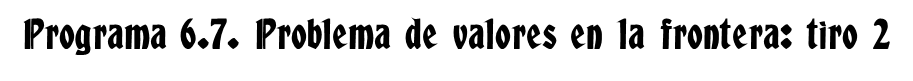

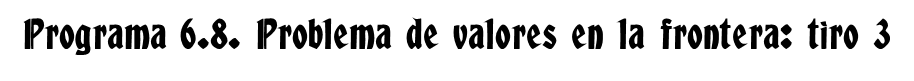